# Part 1: Experiment design

Question: We want to know what is the improvement in terms of number of rentals and the revenue generated when professional photos are used in a listing instead of non professional photos.

**Data to be selected:**

1. In order to determine this we can select all listings that have ONLY changed their photos to professional photos between 2016 and now. We want to make sure we don't select listings where the text has also been changed in order to avoid the influence of change in copy in the results. We select from 2016 because we want to know if it has had an influence recently.

2. For all these listings we can take 1 month of data before and after the change of pictures with data being the number of rentals and the revenue generated by these rentals. (Note that we only take 1 month to minimize the seasonality effect in the data. Indeed if we were to take 3 months we would increase the effect of comparing before and during summer for example, which has an influence itself on the price)

**Analysis of the results:**

Once we have collected the two sets of data we can plot the frequency distribution of before and after the change (with revenue and number of rentals) and check if the difference between the mean of the two is statistically significant. This can be done by performing a two sample t-test with a confidence interval of 95%.

# Part 2: Result analysis

In [55]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns

In [16]:
# Open json file
rides = pd.read_json("intervals_challenge.json", lines=True)

In [17]:
# Visualize the first 5 lines of the file
rides.head()

,city_id,distance,duration,started_at,trip_id,type,vehicle_id
0,pentos,5384,857,2016-10-03 13:00:00.286999941,c00cee6963e0dc66e50e271239426914,driving_to_destination,52d38cf1a3240d5cbdcf730f2d9a47d6
1,volantis,1248,245,2016-10-03 13:00:00.852999926,427425e1f4318ca2461168bdd6e4fcbd,going_to_pickup,8336b28f24c3e7a1e3d582073b164895
2,pentos,5847,1249,2016-10-03 13:00:01.670000076,757867f6d7c00ef92a65bfaa3895943f,driving_to_destination,8885c59374cc539163e83f01ed59fd16
3,bravos,2585,471,2016-10-03 13:00:01.841000080,d09d1301d361f7359d0d936557d10f89,going_to_pickup,81b63920454f70b6755a494e3b28b3a7
4,pentos,743,182,2016-10-03 13:00:01.970000029,00f20a701f0ec2519353ef3ffaf75068,going_to_pickup,b73030977cbad61c9db55418909864fa


Note: the column rider_id is missing 

First the types of the various columns need to be checked and if there are any null values in our columns

In [18]:
# Check the types of the columns
rides.dtypes

city_id               object
distance              object
duration              object
started_at    datetime64[ns]
trip_id               object
type                  object
vehicle_id            object
dtype: object

One can see that distance and duration are an object whereas they should be an integer. Let's change them to integer

The change to integer for distance doesn't work as the distance column contains 1157 times the value NA

In [32]:
# Check the number of rows in rides
rides.shape

(165170, 7)

Out of 165170 rows we only have 1157 rows with NA so it can safely be removed

In [41]:
# Remove the instances of "NA" in the distance column
rides = rides[~rides["distance"].str.contains("NA", na=False)]

In [42]:
# Check the number of rows again to see if we didn't loose too many rows
test.shape

(164013, 7)

In [44]:
# Change the type of the distance column to integer
rides = rides.astype({"distance": "int64"})

In [48]:
# Change the type of the duration column to integer
rides = rides.astype({"duration": "int64"})

In [50]:
# Check if the type of distance and duration column have been changed to integer
rides.dtypes

city_id               object
distance               int64
duration               int64
started_at    datetime64[ns]
trip_id               object
type                  object
vehicle_id            object
dtype: object

Let's check if there are any null or NAN values

In [52]:
# Check for null values in the rides dataframe
rides.isnull().sum()

city_id       0
distance      0
duration      0
started_at    0
trip_id       0
type          0
vehicle_id    0
dtype: int64

There are no NAN values in the dataframe

In [51]:
# Let´s look at some basic statistics for distance and duration columns
rides.describe()

,distance,duration
count,1.640130e+05,164013.000000
mean,1.944164e+03,432.959534
std,7.230917e+03,559.097970
min,0.000000e+00,0.000000
25%,1.900000e+01,55.000000
50%,6.080000e+02,246.000000
75%,2.349000e+03,616.000000
max,1.218089e+06,48654.000000


In both case the standard deviation is higher than the mean and the median is very different from the mean. This tells us that we might have some outliers. Let´s plot a distribution of the two columns to have a better idea of what is going on.

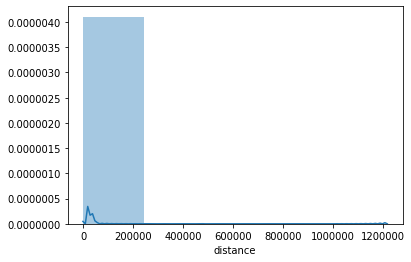

In [58]:
sns.distplot(rides["distance"], 5)

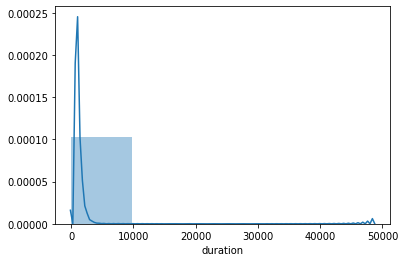

In [59]:
sns.distplot(rides["duration"], 5)

We can see that there are a lot of outliers to remove.


I don't have time to finish the problem but I will explain below how I would try to solve it.

1. I would remove the outliers from distance and duration (this can be done by removing the data that sits at more than 3 time Z value from the mean)

2. I would create a new column called ride_type where each ride would be labelled road or linear as a function of the trip_id

3. Plot the correlation between distance and duration for each of the ride_type (road and linear).

4.  My hypothesis is that there should be a much higher correlation in the case of road and lower for linear. If that was the case it would show that the road estimation is worth implementing as it will improve greatly the user experience and make the job of the drivers easier.

5. In terms of the cost of the implementation and the max price per query the company could pay, I would evaluate the total numbers of rides that would need an API query. I would ask the company which is the maximum budget available for API queries and divide the two to find the maximum amount that can be paid per query.